<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/ml_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Machine Learning (ML) using scikit-learn

Types of machine learning (ML)

*   **Supervised learning** (labelled data, direct feedback, predict outcome)
*   Unsupervised learning (no labels, no feedback, find hidden structure in data)
*   Reinforcement learning (decision process, reward system, learn series of actions)

## Supervised machine learning

Build a modell from labeled training data to make prediction for unseen or future data.

*    classification (predict discrete integer/label values)
*    regression (predict continuous float value)

## Python packages used

*    Scikit-learn
*    Matplotlib
*    pickle

Working examples are presented to introduce suprvised Machnine Learning tasks.


## Import neccessary Python modules

In [37]:
import pickle
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix

## General function to display classes

We will use this function later to display model results.

In [5]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """ Displays 2D
    """
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

## Loading and discovering sample data

Discover the description of the sample wine data set.

In [19]:
dat = datasets.load_wine()
print(dat.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

We will build models from the labelled samples to estimate target classes from new features. There are several method to use supervised machine learning. First we use the LogisticRegression wich is a classification method even if its name refers to regression.

It is common to use variable *X* for the array of features and variable *y* for the vector of labels (targets). *X* has to contain float values, *None* values are not allowed. The *y* vector has continuous integer values from zero.

For the simplicity let's use only the first two features (columns).

In [56]:
X = dat.data[:,0:2]
y = dat.target
print(f"Sizes of X: {X.shape}")
print(f"Size  of y: {y.shape[0]}")

Sizes of X: (178, 2)
Size  of y: 178


In case of supervised machine learning the sample data set is devided into two parts, training and test sets.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## Create the first model and train it

In [58]:
lr = LinearRegression()
_ = lr.fit(X_train, y_train)

## Test the model using the test data set

A special feature of linear regression classifier to output float values. We have to round it to the closest integer.

In [59]:
y_pred = (lr.predict(X_test)+0.5).astype(int)
y_train_pred = (lr.predict(X_train)+0.5).astype(int)

## Evaluate the model

Let's calculate the accuracy of the predicted labels from the model, both for the test set and the training set. Are you satisfied with the result? If we would use a random number generator the accuracy for the predicted values were 33%. Our result is better, so something was learnt from the data, but the result is not good enough.

In [60]:
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = y_pred)*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_train, y_pred = y_train_pred)*100:.1f}%")

Test  data accuracy: 57.4%
Test  data accuracy: 58.9%


Using the function which we define at the beginning of the tutorial, lett's display the result graphicaly. From the chart below we can realize LinearRegression model is not the best for our aims. On the other hand we can ask, are the first two features significant enough?

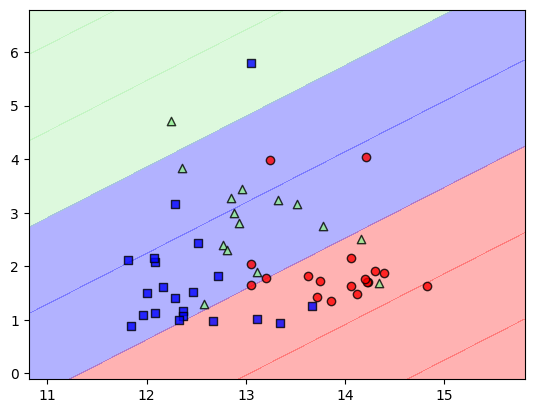

In [61]:
plot_decision_regions(X_test, y_test, lr)

In [62]:
logit = LogisticRegression(max_iter = 2500) #, C=10, solver='newton-cholesky')
logit.fit(X_train, y_train)
print(f"Train data accuracy: {logit.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {logit.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 83.1%
Test  data accuracy: 75.9%


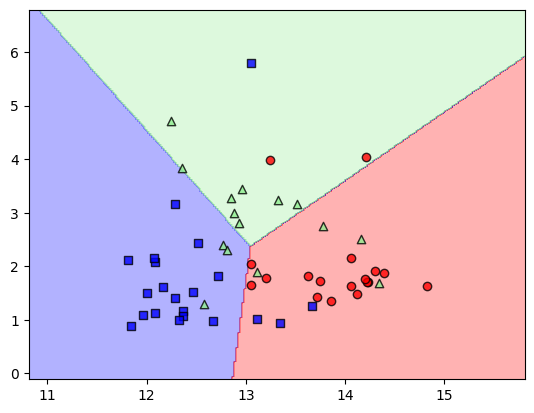

In [63]:
plot_decision_regions(X_test, y_test, logit)

There are 13 features for the wines in the data set. For the simplicity reduce the data set to two features. Let's try to find the two most significant ones.